<a href="https://colab.research.google.com/github/nravinuthala/EVA4.0/blob/master/Assignment9/S9_Nagaraj_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install
#from pypi
!pip install albumentations
#latest version directly from github before released to pypi
!pip install -U git+https://github.com/albu/albumentations

     |████████████████████████████████| 634kB 7.5MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=67c2bb61337623896545f070465ce35b26d172dc8013aa54d36926439e47308a
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-qtf8icip
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-qtf8icip
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=d0fb985d81a9ffac3279f45fb680edda9c822c415a8825e840cb0ced8fd63a8b
  Stored in directory: /tmp/pip-ephem-wheel-cache-w903hanf/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: album

In [2]:
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EVA4.0/Phase1/Session9')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from models import resnet, my_model
import cifar10_data_provider, my_trainer

In [4]:
train, test, classes = cifar10_data_provider.download_data()
train_loader, test_loader = cifar10_data_provider.get_train_test_loaders(train, test)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog


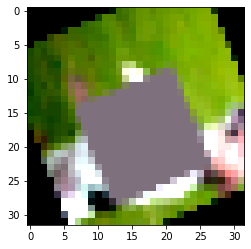

In [9]:
cifar10_data_provider.display(train_loader, classes)

In [10]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet.ResNet18().to(device)
#model = my_model.Net().to(device)

cuda


In [11]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [12]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
train_losses = []
test_losses = []
train_acc = []
test_acc = []
model = resnet.ResNet18().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.008, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)

EPOCHS = 30

my_trainer.run(model, device, train_loader, test_loader, optimizer, EPOCHS, train_losses, train_acc, test_losses, test_acc)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.6051775217056274 Batch_id=195 Accuracy=33.24: 100%|██████████| 196/196 [00:29<00:00,  6.74it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 4050/10000 (40.50%)

EPOCH: 1


Loss=1.4381016492843628 Batch_id=195 Accuracy=44.37: 100%|██████████| 196/196 [00:29<00:00,  6.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 5023/10000 (50.23%)

EPOCH: 2


Loss=1.3119937181472778 Batch_id=195 Accuracy=50.87: 100%|██████████| 196/196 [00:29<00:00,  6.74it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0136, Accuracy: 5435/10000 (54.35%)

EPOCH: 3


Loss=1.2532737255096436 Batch_id=195 Accuracy=54.64: 100%|██████████| 196/196 [00:29<00:00,  6.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0131, Accuracy: 5535/10000 (55.35%)

EPOCH: 4


Loss=1.263680100440979 Batch_id=195 Accuracy=57.96: 100%|██████████| 196/196 [00:28<00:00,  6.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 6477/10000 (64.77%)

EPOCH: 5


Loss=1.1208845376968384 Batch_id=195 Accuracy=60.37: 100%|██████████| 196/196 [00:29<00:00,  6.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 6680/10000 (66.80%)

EPOCH: 6


Loss=1.0270143747329712 Batch_id=195 Accuracy=62.46: 100%|██████████| 196/196 [00:29<00:00,  6.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 7030/10000 (70.30%)

EPOCH: 7


Loss=1.0298559665679932 Batch_id=195 Accuracy=64.20: 100%|██████████| 196/196 [00:29<00:00,  6.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 7099/10000 (70.99%)

EPOCH: 8


Loss=1.039353609085083 Batch_id=195 Accuracy=65.69: 100%|██████████| 196/196 [00:29<00:00,  6.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 7189/10000 (71.89%)

EPOCH: 9


Loss=1.028772234916687 Batch_id=195 Accuracy=66.68: 100%|██████████| 196/196 [00:29<00:00,  6.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 7384/10000 (73.84%)

EPOCH: 10


Loss=1.024932622909546 Batch_id=195 Accuracy=68.04: 100%|██████████| 196/196 [00:29<00:00,  6.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 7343/10000 (73.43%)

EPOCH: 11


Loss=0.8161236643791199 Batch_id=195 Accuracy=68.92: 100%|██████████| 196/196 [00:29<00:00,  6.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 7330/10000 (73.30%)

EPOCH: 12


Loss=0.6457921266555786 Batch_id=195 Accuracy=69.72: 100%|██████████| 196/196 [00:29<00:00,  6.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 7487/10000 (74.87%)

EPOCH: 13


Loss=0.7892854809761047 Batch_id=195 Accuracy=71.01: 100%|██████████| 196/196 [00:30<00:00,  6.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7758/10000 (77.58%)

EPOCH: 14


Loss=0.6748746633529663 Batch_id=195 Accuracy=71.55: 100%|██████████| 196/196 [00:29<00:00,  6.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7764/10000 (77.64%)

EPOCH: 15


Loss=0.6736716628074646 Batch_id=195 Accuracy=72.41: 100%|██████████| 196/196 [00:29<00:00,  6.57it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7713/10000 (77.13%)

EPOCH: 16


Loss=0.7747105360031128 Batch_id=195 Accuracy=73.06: 100%|██████████| 196/196 [00:29<00:00,  6.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 7516/10000 (75.16%)

EPOCH: 17


Loss=0.7524335980415344 Batch_id=195 Accuracy=73.47: 100%|██████████| 196/196 [00:30<00:00,  6.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7600/10000 (76.00%)

EPOCH: 18


Loss=0.8438992500305176 Batch_id=195 Accuracy=73.93: 100%|██████████| 196/196 [00:30<00:00,  6.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 7607/10000 (76.07%)

EPOCH: 19


Loss=0.8262858390808105 Batch_id=195 Accuracy=74.93: 100%|██████████| 196/196 [00:29<00:00,  6.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 8103/10000 (81.03%)

EPOCH: 20


Loss=0.6064565181732178 Batch_id=195 Accuracy=75.24: 100%|██████████| 196/196 [00:30<00:00,  6.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8066/10000 (80.66%)

EPOCH: 21


Loss=0.7588059306144714 Batch_id=195 Accuracy=75.48: 100%|██████████| 196/196 [00:29<00:00,  6.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8215/10000 (82.15%)

EPOCH: 22


Loss=0.6722314357757568 Batch_id=195 Accuracy=76.10: 100%|██████████| 196/196 [00:29<00:00,  6.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7853/10000 (78.53%)

EPOCH: 23


Loss=0.5974664688110352 Batch_id=195 Accuracy=76.63: 100%|██████████| 196/196 [00:28<00:00,  6.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8131/10000 (81.31%)

EPOCH: 24


Loss=0.8399637937545776 Batch_id=195 Accuracy=76.86: 100%|██████████| 196/196 [00:29<00:00,  6.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7910/10000 (79.10%)

EPOCH: 25


Loss=0.5445067882537842 Batch_id=195 Accuracy=77.36: 100%|██████████| 196/196 [00:29<00:00,  6.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8067/10000 (80.67%)

EPOCH: 26


Loss=0.6215318441390991 Batch_id=195 Accuracy=77.62: 100%|██████████| 196/196 [00:29<00:00,  6.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 8101/10000 (81.01%)

EPOCH: 27


Loss=0.4888014793395996 Batch_id=195 Accuracy=78.14: 100%|██████████| 196/196 [00:29<00:00,  6.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8286/10000 (82.86%)

EPOCH: 28


Loss=0.7110623121261597 Batch_id=195 Accuracy=78.56: 100%|██████████| 196/196 [00:29<00:00,  6.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8192/10000 (81.92%)

EPOCH: 29


Loss=0.5866081714630127 Batch_id=195 Accuracy=78.59: 100%|██████████| 196/196 [00:29<00:00,  6.67it/s]



Test set: Average loss: 0.0050, Accuracy: 8306/10000 (83.06%)



In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.008, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)

EPOCHS = 30

my_trainer.run(model, device, train_loader, test_loader, optimizer, EPOCHS, train_losses, train_acc, test_losses, test_acc)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.6041008830070496 Batch_id=195 Accuracy=79.07: 100%|██████████| 196/196 [00:29<00:00,  6.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8334/10000 (83.34%)

EPOCH: 1


Loss=0.561286211013794 Batch_id=195 Accuracy=79.29: 100%|██████████| 196/196 [00:30<00:00,  6.53it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8340/10000 (83.40%)

EPOCH: 2


Loss=0.5689781904220581 Batch_id=195 Accuracy=79.35: 100%|██████████| 196/196 [00:29<00:00,  6.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8226/10000 (82.26%)

EPOCH: 3


Loss=0.6533897519111633 Batch_id=195 Accuracy=79.76: 100%|██████████| 196/196 [00:30<00:00,  6.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8009/10000 (80.09%)

EPOCH: 4


Loss=0.6380519270896912 Batch_id=195 Accuracy=79.94: 100%|██████████| 196/196 [00:29<00:00,  6.54it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8215/10000 (82.15%)

EPOCH: 5


Loss=0.3953724205493927 Batch_id=195 Accuracy=80.49: 100%|██████████| 196/196 [00:30<00:00,  6.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8159/10000 (81.59%)

EPOCH: 6


Loss=0.4862235188484192 Batch_id=195 Accuracy=80.70: 100%|██████████| 196/196 [00:29<00:00,  6.58it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8379/10000 (83.79%)

EPOCH: 7


Loss=0.49039262533187866 Batch_id=195 Accuracy=80.74: 100%|██████████| 196/196 [00:29<00:00,  6.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8500/10000 (85.00%)

EPOCH: 8


Loss=0.6374590396881104 Batch_id=195 Accuracy=81.15: 100%|██████████| 196/196 [00:30<00:00,  6.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8437/10000 (84.37%)

EPOCH: 9


Loss=0.46645134687423706 Batch_id=195 Accuracy=81.43: 100%|██████████| 196/196 [00:29<00:00,  6.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8511/10000 (85.11%)

EPOCH: 10


Loss=0.4421800971031189 Batch_id=195 Accuracy=81.75: 100%|██████████| 196/196 [00:29<00:00,  6.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8396/10000 (83.96%)

EPOCH: 11


Loss=0.5589641332626343 Batch_id=195 Accuracy=81.61: 100%|██████████| 196/196 [00:29<00:00,  6.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8583/10000 (85.83%)

EPOCH: 12


Loss=0.35429227352142334 Batch_id=195 Accuracy=81.80: 100%|██████████| 196/196 [00:29<00:00,  6.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8304/10000 (83.04%)

EPOCH: 13


Loss=0.5121339559555054 Batch_id=195 Accuracy=82.30: 100%|██████████| 196/196 [00:29<00:00,  6.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8534/10000 (85.34%)

EPOCH: 14


Loss=0.43913641571998596 Batch_id=195 Accuracy=82.50: 100%|██████████| 196/196 [00:29<00:00,  6.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8553/10000 (85.53%)

EPOCH: 15


Loss=0.4902314245700836 Batch_id=195 Accuracy=82.55: 100%|██████████| 196/196 [00:29<00:00,  6.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8407/10000 (84.07%)

EPOCH: 16


Loss=0.6786962747573853 Batch_id=195 Accuracy=83.11: 100%|██████████| 196/196 [00:29<00:00,  6.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8593/10000 (85.93%)

EPOCH: 17


Loss=0.42626842856407166 Batch_id=195 Accuracy=82.74: 100%|██████████| 196/196 [00:29<00:00,  6.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8611/10000 (86.11%)

EPOCH: 18


Loss=0.33901315927505493 Batch_id=195 Accuracy=83.25: 100%|██████████| 196/196 [00:29<00:00,  6.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8672/10000 (86.72%)

EPOCH: 19


Loss=0.7518698573112488 Batch_id=195 Accuracy=83.07: 100%|██████████| 196/196 [00:29<00:00,  6.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8560/10000 (85.60%)

EPOCH: 20


Loss=0.440196692943573 Batch_id=195 Accuracy=83.59: 100%|██████████| 196/196 [00:29<00:00,  6.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8438/10000 (84.38%)

EPOCH: 21


Loss=0.4493085741996765 Batch_id=195 Accuracy=83.64: 100%|██████████| 196/196 [00:29<00:00,  6.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8414/10000 (84.14%)

EPOCH: 22


Loss=0.4642912745475769 Batch_id=195 Accuracy=83.93: 100%|██████████| 196/196 [00:29<00:00,  6.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8526/10000 (85.26%)

EPOCH: 23


Loss=0.42211905121803284 Batch_id=195 Accuracy=84.11: 100%|██████████| 196/196 [00:29<00:00,  6.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8701/10000 (87.01%)

EPOCH: 24


Loss=0.4508933424949646 Batch_id=195 Accuracy=84.11: 100%|██████████| 196/196 [00:29<00:00,  6.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8487/10000 (84.87%)

EPOCH: 25


Loss=0.4521891176700592 Batch_id=195 Accuracy=84.37: 100%|██████████| 196/196 [00:29<00:00,  6.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8710/10000 (87.10%)

EPOCH: 26


Loss=0.5449171662330627 Batch_id=195 Accuracy=84.38: 100%|██████████| 196/196 [00:29<00:00,  6.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8683/10000 (86.83%)

EPOCH: 27


Loss=0.4959180951118469 Batch_id=195 Accuracy=84.78: 100%|██████████| 196/196 [00:29<00:00,  6.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8633/10000 (86.33%)

EPOCH: 28


Loss=0.37813064455986023 Batch_id=195 Accuracy=84.58: 100%|██████████| 196/196 [00:29<00:00,  6.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8683/10000 (86.83%)

EPOCH: 29


Loss=0.7543684244155884 Batch_id=195 Accuracy=84.74: 100%|██████████| 196/196 [00:29<00:00,  6.71it/s]



Test set: Average loss: 0.0043, Accuracy: 8606/10000 (86.06%)



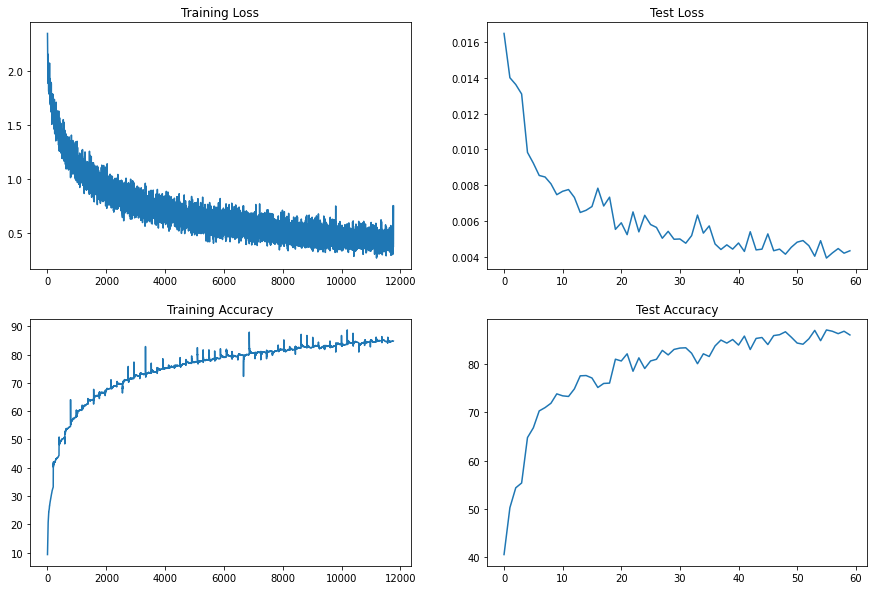

In [14]:
%matplotlib inline
my_trainer.plot(train_losses, train_acc, test_losses, test_acc)